The Use_of_Force Data was provided by the Seattle Police Department and we looked at the police department database and downloaded a Uof_Data file that had additional fields. 

In [1]:
#pip install -r requirements.txt

In [2]:
pip install matplotlib

You should consider upgrading via the '/Users/Gabriel/.pyenv/versions/3.8.2/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install folium

You should consider upgrading via the '/Users/Gabriel/.pyenv/versions/3.8.2/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

You should consider upgrading via the '/Users/Gabriel/.pyenv/versions/3.8.2/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install openpyxl

You should consider upgrading via the '/Users/Gabriel/.pyenv/versions/3.8.2/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scipy

You should consider upgrading via the '/Users/Gabriel/.pyenv/versions/3.8.2/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
from scipy.stats import chi2_contingency

Importing both files as dataframes below, we look at the datatypes included in the files.

In [8]:
import pandas as pd
UOF1 = pd.read_csv('Data/Use_Of_Force.csv', low_memory=False)

UOF2 = pd.read_excel('Data/UoF_Data.xlsx')

In [9]:
UOF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13172 entries, 0 to 13171
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13172 non-null  object
 1   Incident_Num       13172 non-null  int64 
 2   Incident_Type      13172 non-null  object
 3   Occured_date_time  13172 non-null  object
 4   Precinct           13172 non-null  object
 5   Sector             12428 non-null  object
 6   Beat               13172 non-null  object
 7   Officer_ID         13172 non-null  int64 
 8   Subject_ID         13172 non-null  int64 
 9   Subject_Race       13172 non-null  object
 10  Subject_Gender     13172 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.1+ MB


In [10]:
UOF1['ID']

0          2014UOF-0001-1377-203
1          2014UOF-0002-1098-166
2          2014UOF-0003-1031-125
3           2014UOF-0004-767-126
4          2014UOF-0005-1473-172
                  ...           
13167    2021UOF-0399-2823-25386
13168    2021UOF-0400-1071-14864
13169    2021UOF-0401-1078-25432
13170    2021UOF-0404-2868-25253
13171    2021UOF-0405-1233-17340
Name: ID, Length: 13172, dtype: object

In [11]:
UOF1['Incident_Num']

0          251
1          218
2          178
3          179
4          223
         ...  
13167    62916
13168    62985
13169    63039
13170    62800
13171    62106
Name: Incident_Num, Length: 13172, dtype: int64

In [12]:
UOF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12769 entries, 0 to 12768
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   File Num                        12769 non-null  object        
 1   GO Num                          12769 non-null  int64         
 2   CIT Certified Ind               12769 non-null  object        
 3   Incident Type                   12769 non-null  object        
 4   Latitude                        12256 non-null  float64       
 5   Longitude                       12256 non-null  float64       
 6   Officer Gender                  12769 non-null  object        
 7   Officer Race                    12769 non-null  object        
 8   Officer Serial Num              12769 non-null  object        
 9   Officer Title (as of Incident)  10353 non-null  object        
 10  Precinct                        12769 non-null  object        
 11  Se

In [13]:
UOF2['File Num']

0        2014UOF-1365
1        2020UOF-1291
2        2021UOF-0179
3        2021UOF-0324
4        2021UOF-0226
             ...     
12764    2014UOF-0710
12765    2014UOF-0710
12766    2015UOF-0576
12767    2014UOF-0361
12768    2015UOF-0055
Name: File Num, Length: 12769, dtype: object

While comparing UOF1['ID'] and UOF['File Num'] , it is clear that UOF['File Num'] = UOF1['ID'] + additional strings. We need to clean that column so that it can be an exact match that both tables can be merged on.

In [ ]:
UOF2['GO Num']

In [ ]:
UOF2['Officer Serial Num']

Below we start to split UOF1['ID']. We do a right split on the string and use '-' as the separator. 
Then we drop the extra columns that contain the part of the string that isn't needed.

In [16]:
#Split the Id in the Use of Force Dataset and set the number of splits to 2 using the character '-'
split_columns = UOF1['ID'].str.rsplit("-", n=2, expand=True)
split_columns

,0,1,2
0,2014UOF-0001,1377,203
1,2014UOF-0002,1098,166
2,2014UOF-0003,1031,125
3,2014UOF-0004,767,126
4,2014UOF-0005,1473,172
...,...,...,...
13167,2021UOF-0399,2823,25386
13168,2021UOF-0400,1071,14864
13169,2021UOF-0401,1078,25432
13170,2021UOF-0404,2868,25253


In [17]:
#drop the extra columns
split_columns = split_columns.drop(split_columns.columns[[1, 2]], axis=1)
split_columns.head()

,0
0,2014UOF-0001
1,2014UOF-0002
2,2014UOF-0003
3,2014UOF-0004
4,2014UOF-0005


Then we merge the split column with the original file and rename the columns as needed.

In [ ]:
#add the new FILE NUM column to UOF1 and do the corresponding adjustments
UOF1 = pd.concat([UOF1, split_columns], axis=1)
rename_dict = {
    0:"File Num",
    "Incident_Num ":"Incident_Number",
    "Incident_Type":"Incident_Type",
    "Occured_date_time":"Occured_date_time",
    "Precinct":"Precinct",
    "Sector":"Sector",
    "Beat":"Beat",
    "Officer_ID":"Officer_ID",
    "Subject_ID":"Subject_ID",
    "Subject_Race":"Subject_Race",
    "Subject_Gender":"Subject_Gender"
}
UOF1 = UOF1.rename(columns=rename_dict)
UOF1 = UOF1.drop(columns=["ID"])
UOF1.head()

In [ ]:
UOF2.head(10)

We analyse both 'File Num' in UOF1 and UOF2

In [20]:
#This is to show the id in table 2 that is not in table 1
table2 = UOF2['File Num'].to_list()
table1 = UOF1['File Num'].to_list()
for v,i in enumerate(table2):
    if i not in table1:
        print(v,i)
        

6282 2020UOF-1983


In [21]:
UOF1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13172 entries, 0 to 13171
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Incident_Num       13172 non-null  int64 
 1   Incident_Type      13172 non-null  object
 2   Occured_date_time  13172 non-null  object
 3   Precinct           13172 non-null  object
 4   Sector             12428 non-null  object
 5   Beat               13172 non-null  object
 6   Officer_ID         13172 non-null  int64 
 7   Subject_ID         13172 non-null  int64 
 8   Subject_Race       13172 non-null  object
 9   Subject_Gender     13172 non-null  object
 10  File Num           13172 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.1+ MB


In [22]:
UOF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12769 entries, 0 to 12768
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   File Num                        12769 non-null  object        
 1   GO Num                          12769 non-null  int64         
 2   CIT Certified Ind               12769 non-null  object        
 3   Incident Type                   12769 non-null  object        
 4   Latitude                        12256 non-null  float64       
 5   Longitude                       12256 non-null  float64       
 6   Officer Gender                  12769 non-null  object        
 7   Officer Race                    12769 non-null  object        
 8   Officer Serial Num              12769 non-null  object        
 9   Officer Title (as of Incident)  10353 non-null  object        
 10  Precinct                        12769 non-null  object        
 11  Se

Before we merge both tables, we drop duplicate File Num. Then we merge on the File Num column and 
add the additional columns from UOF1 

In [ ]:
#merge the two tables using the column File Num
#Incident Num, OccurredDatetime,Beat,Officer id,Subject id

table3 = UOF1[['File Num', 'Incident_Num','Beat','Occured_date_time']]
#remove duplicates
table4 = table3.drop_duplicates(subset=['File Num'])
#merge table4 and UOF2 using column File Num
merged_UOF = UOF2.merge(table4,how ='inner',on='File Num')
merged_UOF

In [24]:
merged_UOF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12768 entries, 0 to 12767
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   File Num                        12768 non-null  object        
 1   GO Num                          12768 non-null  int64         
 2   CIT Certified Ind               12768 non-null  object        
 3   Incident Type                   12768 non-null  object        
 4   Latitude                        12255 non-null  float64       
 5   Longitude                       12255 non-null  float64       
 6   Officer Gender                  12768 non-null  object        
 7   Officer Race                    12768 non-null  object        
 8   Officer Serial Num              12768 non-null  object        
 9   Officer Title (as of Incident)  10352 non-null  object        
 10  Precinct                        12768 non-null  object        
 11  Se

Now that the files have been merged as one, we proceed with additional Exploratory analysis by looking 
at any missing values

In [25]:
merged_UOF.isnull().sum(axis = 0)

File Num                             0
GO Num                               0
CIT Certified Ind                    0
Incident Type                        0
Latitude                           513
Longitude                          513
Officer Gender                       0
Officer Race                         0
Officer Serial Num                   0
Officer Title (as of Incident)    2416
Precinct                             0
Sector                             669
Subject Gender                       0
Subject Race                         0
Occurred Date                        0
Incident_Num                         0
Beat                                 0
Occured_date_time                    0
dtype: int64

In [ ]:
merged_UOF["Sector"].value_counts(dropna=False)

In [ ]:
merged_UOF["Officer Title (as of Incident)"].value_counts(dropna=False)

In [ ]:
merged_UOF["Beat"].value_counts(dropna=False)

In [29]:
merged_UOF["Incident Type"].value_counts(dropna=False)

Level 1 - Use of Force    9106
Level 2 - Use of Force    3461
Level 3 - Use of Force     120
Level 3 - OIS               81
Name: Incident Type, dtype: int64

We decide to rename our columns so it's standardized across the dataframe

In [30]:
merged_UOF.rename(columns={'Officer Title (as of Incident)': 'Officer_Title','File Num':'File_Num','GO Num':'GO_Num','CIT Certified Ind':'CIT_Certified','Incident Type':'Incident_Type','Officer Gender':'Officer_Gender','Officer Race':'Officer_Race','Officer Serial Num':'Officer_Serial_Num','Subject Gender':'Subject_Gender','Subject Race':'Subject_Race','Occurred Date':'Occurred_Date'}, inplace=True)

In [31]:
merged_UOF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12768 entries, 0 to 12767
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   File_Num            12768 non-null  object        
 1   GO_Num              12768 non-null  int64         
 2   CIT_Certified       12768 non-null  object        
 3   Incident_Type       12768 non-null  object        
 4   Latitude            12255 non-null  float64       
 5   Longitude           12255 non-null  float64       
 6   Officer_Gender      12768 non-null  object        
 7   Officer_Race        12768 non-null  object        
 8   Officer_Serial_Num  12768 non-null  object        
 9   Officer_Title       10352 non-null  object        
 10  Precinct            12768 non-null  object        
 11  Sector              12099 non-null  object        
 12  Subject_Gender      12768 non-null  object        
 13  Subject_Race        12768 non-null  object    

In [ ]:
merged_UOF.sample(5)

In [33]:
merged_UOF['Precinct'].value_counts(dropna=False)

West         3733
North        2926
East         2548
South        2184
Southwest     708
X             341
-             315
0              12
OOJ             1
Name: Precinct, dtype: int64

In [ ]:
merged_UOF['Beat'].value_counts()

In [35]:
merged_UOF.shape

(12768, 18)

Here, we replace the missing values ('-' and 'Not Specified') on the Sector, Beat, Precinct and 
Subject_Race columns with Nan. This will make it easier for us to do some feature engineering should we choose 
to do so.

In [ ]:
import numpy as np
cols = ["Sector","Beat","Precinct", "Subject_Race"]
merged_UOF[cols] = merged_UOF[cols].replace({'-':np.nan, 'Not Specified':np.nan})

merged_UOF.tail()

In [ ]:
merged_UOF['Sector'].value_counts(dropna=False)


In [ ]:
merged_UOF['Beat'].value_counts(dropna=False)

In [ ]:
merged_UOF.tail()

In [40]:
merged_UOF['Subject_Race'].value_counts(dropna=False)

White                            5198
Black or African American        3793
NaN                              2685
Hispanic or Latino                451
Asian                             443
American Indian/Alaska Native     123
Nat Hawaiian/Oth Pac Islander      75
Name: Subject_Race, dtype: int64

In [41]:
merged_UOF['Subject_Gender'].value_counts(dropna=False)

Male             9587
Female           2686
Not Specified     495
Name: Subject_Gender, dtype: int64

In [42]:
merged_UOF['Officer_Gender'].value_counts(dropna=False)

M    11397
F     1370
N        1
Name: Officer_Gender, dtype: int64

In [43]:
merged_UOF['Officer_Race'].value_counts(dropna=False)

White                            9789
Hispanic or Latino                698
Black or African American         535
Not Specified                     521
Two or More Races                 505
Asian                             476
American Indian/Alaska Native     153
Nat Hawaiian/Oth Pac Islander      89
Unknown                             2
Name: Officer_Race, dtype: int64

In [44]:
merged_UOF['CIT_Certified'].value_counts(dropna=False)

N    7495
Y    5273
Name: CIT_Certified, dtype: int64

In [45]:
merged_UOF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12768 entries, 0 to 12767
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   File_Num            12768 non-null  object        
 1   GO_Num              12768 non-null  int64         
 2   CIT_Certified       12768 non-null  object        
 3   Incident_Type       12768 non-null  object        
 4   Latitude            12255 non-null  float64       
 5   Longitude           12255 non-null  float64       
 6   Officer_Gender      12768 non-null  object        
 7   Officer_Race        12768 non-null  object        
 8   Officer_Serial_Num  12768 non-null  object        
 9   Officer_Title       10352 non-null  object        
 10  Precinct            12453 non-null  object        
 11  Sector              12099 non-null  object        
 12  Subject_Gender      12768 non-null  object        
 13  Subject_Race        10083 non-null  object    

In [46]:
merged_UOF['File_Num'] = merged_UOF['File_Num'].astype('category')
merged_UOF['GO_Num'] = merged_UOF['GO_Num'].astype('category')
merged_UOF['CIT_Certified'] = merged_UOF['CIT_Certified'].astype('category')
merged_UOF['Incident_Type'] = merged_UOF['Incident_Type'].astype('category')
merged_UOF['Occured_date_time'] = merged_UOF['Occured_date_time'].astype('datetime64')

In [ ]:
#extract time from date_time column and create a new column with time
merged_UOF['Occured_time'] = merged_UOF['Occured_date_time'].dt.strftime('%H:%M')

merged_UOF.head()

In [48]:
merged_UOF.groupby(['Incident_Num']).size().sort_values(ascending=False)

Incident_Num
14888    5
19458    4
5815     4
8990     3
23097    3
        ..
11037    1
11052    1
11061    1
11066    1
62785    1
Length: 12390, dtype: int64

In [ ]:
merged_UOF[merged_UOF['Incident_Num']==14888]

In [50]:
#the incident # and the File # have the same number of unique values
merged_UOF['Incident_Num'].nunique()

12390

In [51]:
merged_UOF['File_Num'].nunique()

12390

In [52]:
#create the month, year and day columns
merged_UOF['month']  = merged_UOF["Occurred_Date"].dt.to_period("M")
merged_UOF['year']  = merged_UOF["Occurred_Date"].dt.to_period("Y")
merged_UOF["day"] = merged_UOF["Occurred_Date"].dt.weekday #weekdays with Monday = 0 and Sunday = 6

# <font color='red'>EDA without dropping outliers 

In [53]:
#get the number of events per year by droping duplicate file numbers and grouping by the year
merged_UOF_copy = merged_UOF.drop_duplicates(subset='File_Num')

yearly_events = merged_UOF_copy.groupby(['year']).size()
yearly_events = yearly_events.reset_index()
yearly_events.columns = ['Occured_Year','No_of_events']
yearly_events

,Occured_Year,No_of_events
0,2014,1582
1,2015,1964
2,2016,1529
3,2017,1578
4,2018,2203
5,2019,1359
6,2020,1847
7,2021,328


In [54]:
merged_UOF_copy['Officer_Race'].value_counts(dropna=False)

White                            9483
Hispanic or Latino                682
Black or African American         517
Not Specified                     509
Two or More Races                 499
Asian                             464
American Indian/Alaska Native     147
Nat Hawaiian/Oth Pac Islander      87
Unknown                             2
Name: Officer_Race, dtype: int64

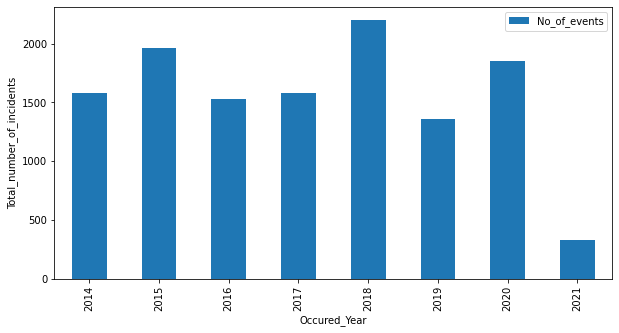

In [55]:
#plot the number of events per year
yearly_events.plot(x="Occured_Year", y="No_of_events", kind="bar",ylabel="Total_number_of_incidents", figsize=(10,5))
plt.show()

In [56]:
#get the count of number of events per month over time

monthly_events = merged_UOF_copy.groupby(['month']).size()
monthly_events.head()

month
2014-01      1
2014-02      1
2014-03      8
2014-04    200
2014-05    254
Freq: M, dtype: int64

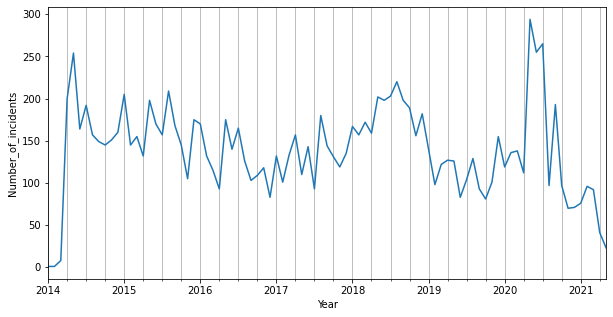

In [57]:
#plot the number of events per month over time
line = monthly_events.plot(xlabel="Year",ylabel="Number_of_incidents",figsize=(10,5))
line.grid('on', which='minor', axis='x' )
line.grid('off', which='major', axis='x' )
plt.show()

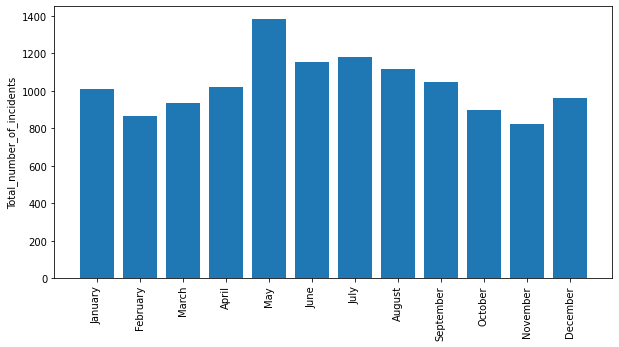

In [58]:
#get the count of number of events per month
merged_UOF_copy_1 = merged_UOF_copy.copy()

merged_UOF_copy_1['month'] = merged_UOF_copy_1['month'].astype('str').str.split('-').str[1]
merged_UOF_copy_1['month'] = merged_UOF_copy_1['month'].astype('int')

group = merged_UOF_copy_1.groupby('month').size()
group = pd.DataFrame(group).reset_index().rename(columns={0:'count'})
group['month'].replace({1: 'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)

# ax_1 = group.plot(kind = 'bar',x='month',figsize=(10,5))

# ax_1.set_ylabel('Number of Events')

# plt.show()

plt.figure(figsize=(10,5))        
plt.bar('month',height = 'count',data=group)
plt.ylabel('Total_number_of_incidents')
plt.xticks(rotation=90)

plt.show()

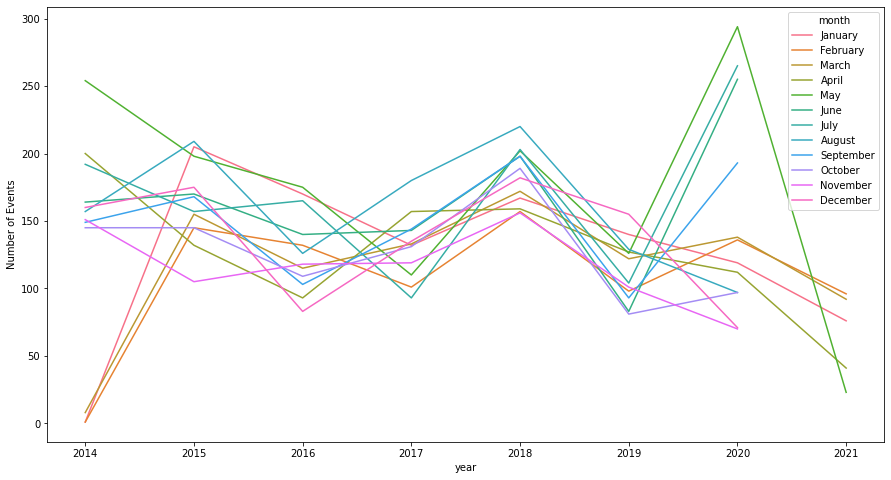

In [59]:
merged_UOF_copy_1['year'] = merged_UOF_copy_1['year'].astype('str')

group_1 = merged_UOF_copy_1.groupby(['year','month']).size()

group_1 = pd.DataFrame(group_1).reset_index().rename(columns={0:'Number of Events'})
group_1['month'].replace({1: 'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)

plt.figure(figsize=(15,8))
g = sns.lineplot(data= group_1, x='year',y='Number of Events',hue="month")

plt.show()

In [60]:
group_1.head()

,year,month,Number of Events
0,2014,January,1
1,2014,February,1
2,2014,March,8
3,2014,April,200
4,2014,May,254


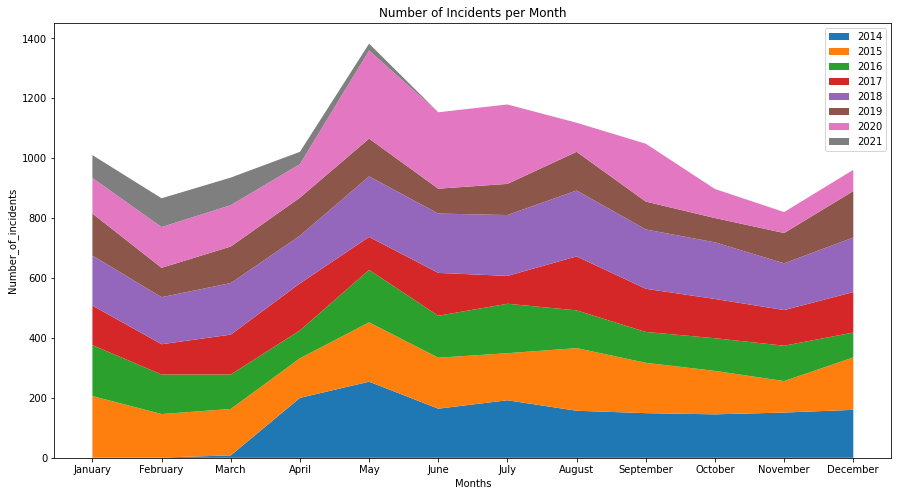

In [61]:
year_list = group_1['year'].unique().tolist()
month_list = group_1['month'].unique().tolist()
count = {}
for i in year_list:
    val = group_1[group_1['year']== i]['Number of Events'].tolist()
    if len(val) < len(month_list):
        val += ([0] * (len(month_list) - len(val)))
    count[i] = val

plt.figure(figsize=(15,8))        
plt.stackplot(month_list, count['2014'], count['2015'],count['2016'],count['2017'],count['2018'],count['2019'],count['2020'],count['2021'],labels=year_list)
plt.title('Number of Incidents per Month')
plt.xlabel('Months')
plt.ylabel('Number_of_incidents')
plt.legend(loc='upper right')
plt.show()



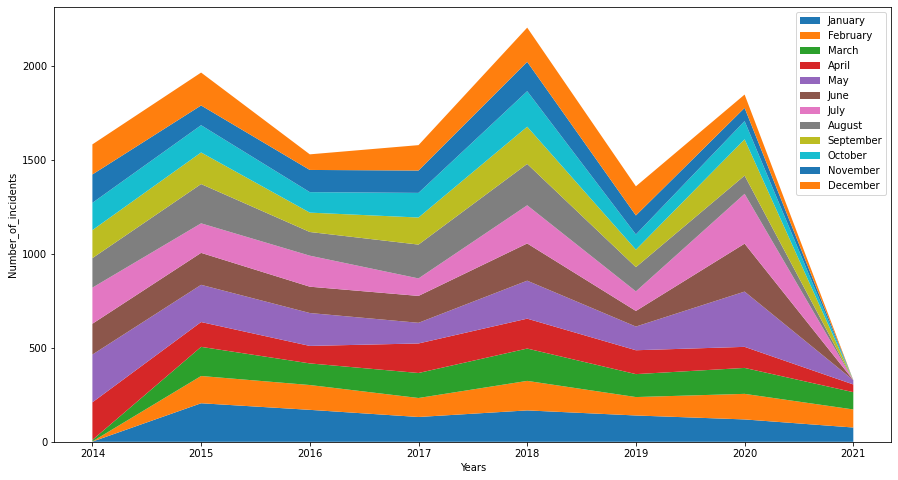

In [62]:
count_2 = {}
for i in month_list:
    val = group_1[group_1['month']== i]['Number of Events'].tolist()
    if len(val) < len(year_list):
        val += ([0] * (len(year_list) - len(val)))
    count_2[i] = val

plt.figure(figsize=(15,8))
plt.stackplot(year_list, count_2['January'], count_2['February'],count_2['March'],count_2['April'],count_2['May'],count_2['June'],count_2['July'],count_2['August'],count_2['September'],count_2['October'],count_2['November'],count_2['December'],labels=month_list)
plt.xlabel('Years')
plt.ylabel('Number_of_incidents')
plt.legend(loc='upper right')
plt.show()

In [63]:
#get the count of number of events per day of week
pd.options.display.max_rows = 10000
pd.options.display.max_columns = 10000

day  = merged_UOF_copy["Occured_date_time"].dt.to_period("D")

daily_events = merged_UOF_copy.groupby(day).size()
daily_events.sort_values(ascending=False)

Occured_date_time
2020-07-25    102
2020-05-30    100
2014-05-01     87
2020-06-01     63
2015-05-01     55
2020-09-07     49
2020-06-07     47
2020-05-31     46
2020-06-02     40
2020-06-08     39
2015-12-06     34
2016-05-01     34
2015-01-24     25
2020-07-02     25
2020-09-23     25
2020-09-24     25
2020-05-29     24
2020-07-01     24
2014-09-27     22
2020-07-19     22
2020-09-26     22
2019-03-27     21
2018-01-01     20
2019-01-19     20
2014-05-20     19
2015-08-24     18
2015-01-19     18
2019-01-11     18
2014-07-30     18
2014-11-28     18
2014-07-20     18
2014-08-13     17
2014-04-26     17
2017-03-28     17
2015-09-20     17
2018-09-25     17
2015-01-13     17
2018-02-10     17
2014-09-14     16
2015-08-25     16
2015-08-02     16
2014-05-13     16
2018-10-22     16
2018-06-06     16
2018-08-10     16
2014-04-18     16
2018-12-22     15
2019-08-06     15
2015-07-25     15
2020-08-16     15
2018-05-05     15
2014-12-18     15
2014-12-06     15
2016-07-07     15
2019-04-16

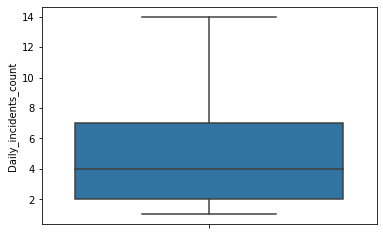

In [64]:
#boxplot of daily event counts
daily_events_df = pd.DataFrame(daily_events).reset_index().rename(columns={0:'count'})
ax_2 = sns.boxplot(y=daily_events_df['count'],showfliers=False)
ax_2.set_ylabel('Daily_incidents_count')
plt.show()

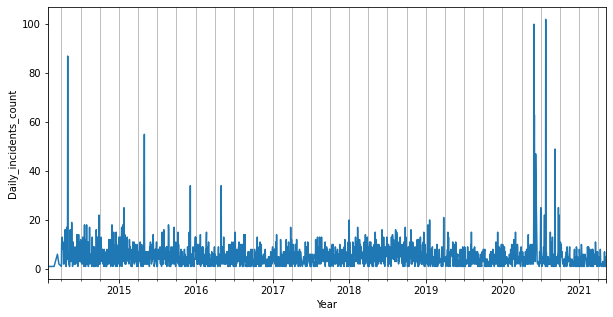

In [65]:
#plot the number of events per day over time
line = daily_events.plot(xlabel="Year",ylabel="Daily_incidents_count",figsize=(10,5))
line.grid('on', which='minor', axis='x' )
line.grid('off', which='major', axis='x' )
plt.show()

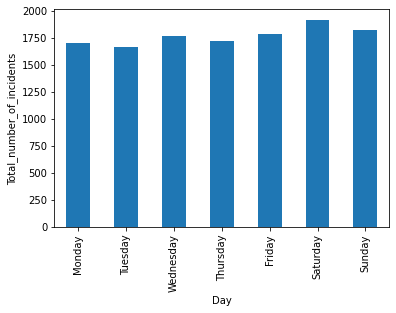

In [66]:
#group events by the day of the week
daily_events_1 = merged_UOF_copy.groupby(["day"]).size()
daily_events_1 = daily_events_1.rename(index={0: 'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}) #changes name of week
daily_events_1.plot(kind = "bar", xlabel="Day",ylabel="Total_number_of_incidents")
plt.show()

In [67]:
#group events by the day of the week
daily_events_df_1 = daily_events_df.copy()

daily_events_df_1['year'] = daily_events_df_1["Occured_date_time"].dt.year
daily_events_df_1['month'] = daily_events_df_1["Occured_date_time"].dt.month
daily_events_df_1['day'] = daily_events_df_1["Occured_date_time"].dt.weekday
# daily_events_df_1['hour'] = daily_events_df_1["Occured_date_time"].dt.hour
daily_events_df_1.tail()

,Occured_date_time,count,year,month,day
2351,2021-05-02,3,2021,5,6
2352,2021-05-04,5,2021,5,1
2353,2021-05-06,1,2021,5,3
2354,2021-05-07,4,2021,5,4
2355,2021-05-08,3,2021,5,5


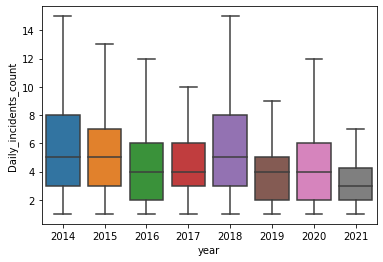

In [68]:
#plot the daily event counts per year
ax_3 = sns.boxplot(x=daily_events_df_1['year'], y=daily_events_df_1['count'],showfliers=False)
ax_3.set_ylabel('Daily_incidents_count')
plt.show()

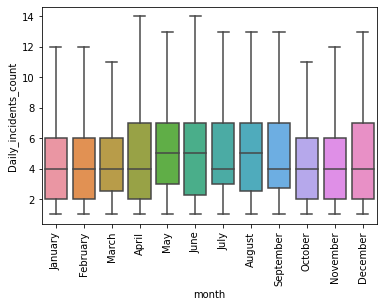

In [69]:
#plot the daily event counts per month
daily_events_df_1.sort_values(by=['month'])
daily_events_df_1['month'] = daily_events_df_1['month'].replace({1: 'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
ax_4 = sns.boxplot(x=daily_events_df_1['month'], y=daily_events_df_1['count'],showfliers=False)
ax_4.set_ylabel('Daily_incidents_count')
plt.xticks(rotation=90)
plt.show()

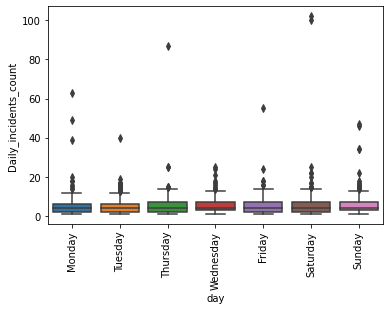

In [70]:
#plot the daily event counts per weekday
daily_events_df_1.sort_values(by=['day'])
daily_events_df_1['day'] = daily_events_df_1['day'].replace({0: 'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
ax_5 = sns.boxplot(x=daily_events_df_1['day'], y=daily_events_df_1['count'],showfliers=True)
ax_5.set_ylabel('Daily_incidents_count')
plt.xticks(rotation=90)
plt.show()

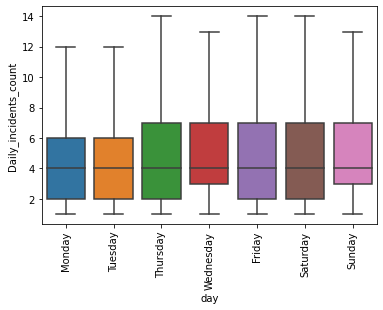

In [71]:
#plot the daily event counts per weekday
daily_events_df_1.sort_values(by=['day'])
daily_events_df_1['day'] = daily_events_df_1['day'].replace({0: 'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
ax_5 = sns.boxplot(x=daily_events_df_1['day'], y=daily_events_df_1['count'],showfliers=False)
ax_5.set_ylabel('Daily_incidents_count')
plt.xticks(rotation=90)
plt.show()

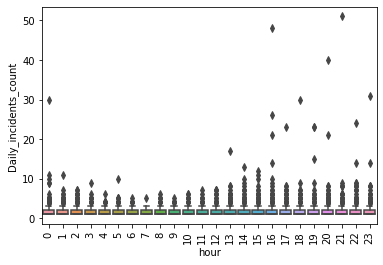

In [72]:
hour = merged_UOF_copy["Occured_date_time"].dt.to_period("H")
hourly_events = merged_UOF_copy.groupby(hour).size()
hourly_events.sort_values(ascending=False)
hourly_events_df = pd.DataFrame(hourly_events).reset_index().rename(columns={0:'count'})
hourly_events_df["Occured_date_time"] = hourly_events_df["Occured_date_time"].astype('str')
hourly_events_df["Occured_date_time"] = hourly_events_df["Occured_date_time"].astype('datetime64')
hourly_events_df["hour"] = hourly_events_df["Occured_date_time"].dt.hour
ax_6 = sns.boxplot(x=hourly_events_df['hour'], y=hourly_events_df['count'],showfliers=True)
ax_6.set_ylabel('Daily_incidents_count')
plt.xticks(rotation=90)
plt.show()

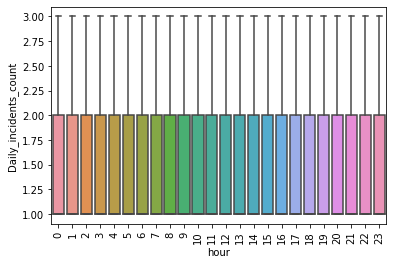

In [73]:
hour = merged_UOF_copy["Occured_date_time"].dt.to_period("H")
hourly_events = merged_UOF_copy.groupby(hour).size()
hourly_events.sort_values(ascending=False)
hourly_events_df = pd.DataFrame(hourly_events).reset_index().rename(columns={0:'count'})
hourly_events_df["Occured_date_time"] = hourly_events_df["Occured_date_time"].astype('str')
hourly_events_df["Occured_date_time"] = hourly_events_df["Occured_date_time"].astype('datetime64')
hourly_events_df["hour"] = hourly_events_df["Occured_date_time"].dt.hour
ax_6 = sns.boxplot(x=hourly_events_df['hour'], y=hourly_events_df['count'],showfliers=False)
ax_6.set_ylabel('Daily_incidents_count')
plt.xticks(rotation=90)
plt.show()

<ipython-input-74-17c0d67f1353>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_UOF_copy["hour"] = merged_UOF_copy["Occured_date_time"].dt.hour


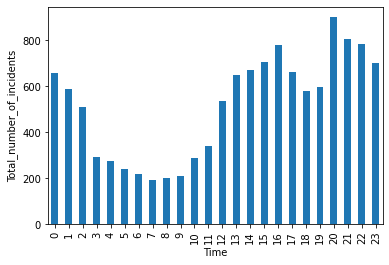

In [74]:
#group events by the time of day
merged_UOF_copy["hour"] = merged_UOF_copy["Occured_date_time"].dt.hour
events_per_time = merged_UOF_copy.groupby(["hour"]).size()
events_per_time.plot(kind = "bar", xlabel="Time",ylabel="Total_number_of_incidents")
plt.show()

In [75]:
merged_UOF_copy['Incident_Type'].unique()

['Level 2 - Use of Force', 'Level 1 - Use of Force', 'Level 3 - Use of Force', 'Level 3 - OIS']
Categories (4, object): ['Level 2 - Use of Force', 'Level 1 - Use of Force', 'Level 3 - Use of Force', 'Level 3 - OIS']

In [ ]:
merged_UOF_copy['Incident_Type'] = merged_UOF_copy['Incident_Type'].replace({'Level 1 - Use of Force': 'Level_1_UOF', 'Level 2 - Use of Force':'Level_2_UOF', 'Level 3 - Use of Force':'Level_3_UOF','Level 3 - OIS':'Level_3_OIS'  })
merged_UOF_copy.tail()

In [77]:
Level_1_UOF = merged_UOF_copy[merged_UOF_copy['Incident_Type'] == 'Level_1_UOF']
Level_2_UOF = merged_UOF_copy[merged_UOF_copy['Incident_Type'] == 'Level_2_UOF']
Level_3_UOF = merged_UOF_copy[merged_UOF_copy['Incident_Type'].isin (['Level_3_UOF','Level_3_OIS'])]
#Level_3_OIS = merged_UOF_copy[merged_UOF_copy['Incident_Type'] == 'Level_3_OIS']

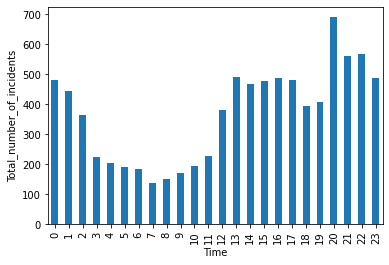

In [78]:
#Level_1_UOF_events per time of day

Level_1_UOF_per_time = Level_1_UOF.groupby(["hour"]).size()
Level_1_UOF_per_time.plot(kind = "bar", xlabel="Time",ylabel="Total_number_of_incidents")
plt.show()

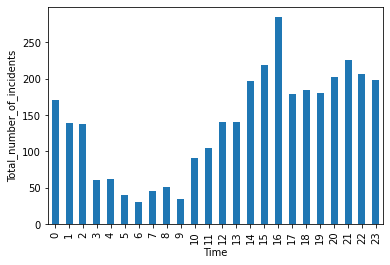

In [79]:
#Level_2_UOF_events per time of day

Level_2_UOF_per_time = Level_2_UOF.groupby(["hour"]).size()
Level_2_UOF_per_time.plot(kind = "bar",xlabel="Time",ylabel="Total_number_of_incidents")
plt.show()

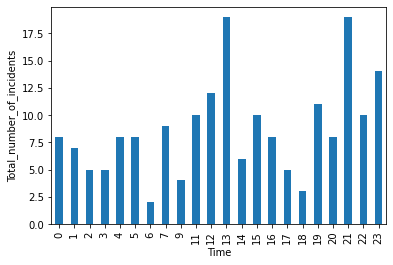

In [80]:
#Level_3_UOF_events per time of day
Level_3_UOF_per_time = Level_3_UOF.groupby(["hour"]).size()
Level_3_UOF_per_time.plot(kind = "bar",xlabel="Time",ylabel="Total_number_of_incidents")
plt.show()

In [81]:
#Level_3_OIS_events per time of day
# Level_3_OIS_per_time = Level_3_OIS.groupby(["hour"]).size()
# Level_3_OIS_per_time.plot(kind = "bar", xlabel="Time",ylabel="Total_number_of_incidents")
# plt.show()

In [82]:

CIT_Certified_monthly = pd.DataFrame(merged_UOF_copy.groupby(['month','CIT_Certified']).size()).reset_index()
CIT_Certified_monthly.tail()

,month,CIT_Certified,0
173,2021-03,Y,42
174,2021-04,N,17
175,2021-04,Y,24
176,2021-05,N,7
177,2021-05,Y,16


In [83]:
CIT_Certified_Y = CIT_Certified_monthly.loc[CIT_Certified_monthly.CIT_Certified == 'Y',0]
CIT_Certified_N = CIT_Certified_monthly.loc[CIT_Certified_monthly.CIT_Certified == 'N',0]

CIT_Certified_monthly['percentage_CIT_cert'] = CIT_Certified_Y/(CIT_Certified_Y + CIT_Certified_N.values)*100
CIT_Certified_monthly.tail()

,month,CIT_Certified,0,percentage_CIT_cert
173,2021-03,Y,42,45.652174
174,2021-04,N,17,NaN
175,2021-04,Y,24,58.536585
176,2021-05,N,7,NaN
177,2021-05,Y,16,69.565217


In [84]:
CIT_Certified_monthly = CIT_Certified_monthly.dropna(subset=['percentage_CIT_cert']).set_index('month').drop(columns=['CIT_Certified',0])
CIT_Certified_monthly.tail()

,percentage_CIT_cert
month,
2021-01,52.631579
2021-02,52.083333
2021-03,45.652174
2021-04,58.536585
2021-05,69.565217


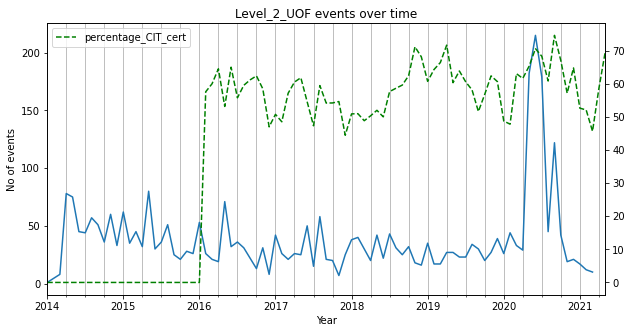

In [85]:
#Level_2_UOF_events per month over time

monthly_Level_2_UOF = Level_2_UOF.groupby(['month']).size()
ax = monthly_Level_2_UOF.plot(title="Level_2_UOF events over time",xlabel="Year",ylabel="No of events",figsize=(10,5))
ax.grid('off', which='minor', axis='x' )
ax.grid('off', which='major', axis='x' )

ax1 = ax.twinx()
ax1.spines['right'].set_position(('axes', 1.0))
ax1.grid('off', which='major', axis='y' )
CIT_Certified_monthly.plot(ax=ax1,style=['g'],linestyle='--')

# ax1 = ax.secondary_yaxis('right')
# CIT_Certified_monthly.plot(ax =ax1 ,style=['g'],linestyle='--')
plt.show()

# <font color='red'>EDA after dropping outliers

In [86]:
#select only the dates when the daily events is less than or equal to 14 from daily_events
daily_events_1 = daily_events.sort_values(ascending=False)
daily_events_1 = pd.DataFrame(daily_events_1).reset_index()
daily_events_1 = daily_events_1[daily_events_1[0] <= 14]
non_outlier_dates = daily_events_1['Occured_date_time'].astype('str').to_list()

In [87]:
#select the data frame from merged_UOF_copy when the daily events is less than or equal to 14
merged_UOF_no_outliers = merged_UOF_copy.copy()
merged_UOF_no_outliers['Occurred_Date'] = merged_UOF_no_outliers['Occurred_Date'].astype('str')
merged_UOF_no_outliers = merged_UOF_no_outliers[merged_UOF_no_outliers['Occurred_Date'].isin (non_outlier_dates)]

**Repeat the analysis without the outliers**

In [88]:
#get the number of events per year

yearly_events = merged_UOF_no_outliers.groupby(['year']).size()
yearly_events = yearly_events.reset_index()
yearly_events.columns = ['Occured_Year','No_of_events']
yearly_events

,Occured_Year,No_of_events
0,2014,1288
1,2015,1703
2,2016,1465
3,2017,1561
4,2018,2056
5,2019,1255
6,2020,1164
7,2021,328


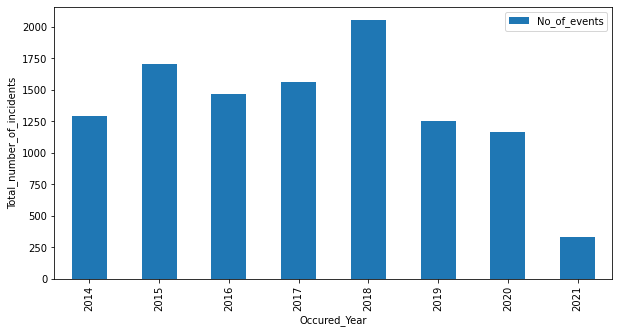

In [89]:
#plot the number of events per year
yearly_events.plot(x="Occured_Year", y="No_of_events", kind="bar",ylabel="Total_number_of_incidents", figsize=(10,5))
plt.show()

In [90]:
#get the count of number of events per month over time

monthly_events = merged_UOF_no_outliers.groupby(['month']).size()
monthly_events.head()

month
2014-01      1
2014-02      1
2014-03      8
2014-04    167
2014-05    132
Freq: M, dtype: int64

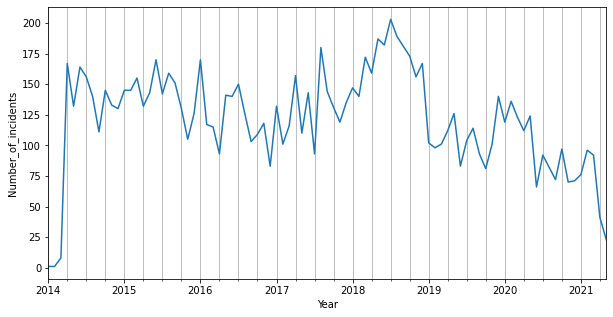

In [91]:
#plot the number of events per month over time
line = monthly_events.plot(xlabel="Year",ylabel="Number_of_incidents",figsize=(10,5))
line.grid('on', which='minor', axis='x' )
line.grid('off', which='major', axis='x' )
plt.show()

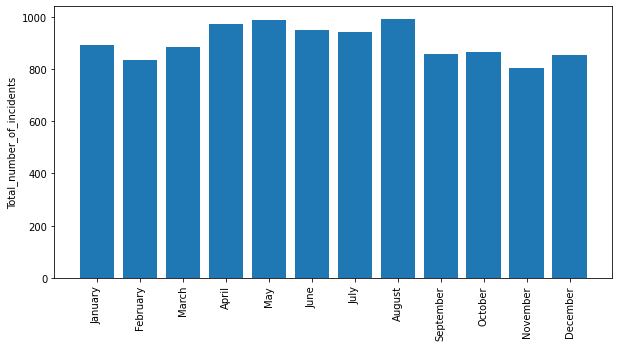

In [92]:
#get the count of number of events per month
merged_UOF_no_outliers_1 = merged_UOF_no_outliers.copy()

merged_UOF_no_outliers_1['month'] = merged_UOF_no_outliers_1['month'].astype('str').str.split('-').str[1]
merged_UOF_no_outliers_1['month'] = merged_UOF_no_outliers_1['month'].astype('int')

group = merged_UOF_no_outliers_1.groupby('month').size()
group = pd.DataFrame(group).reset_index().rename(columns={0:'count'})
group['month'].replace({1: 'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)

plt.figure(figsize=(10,5))        
plt.bar('month',height = 'count',data=group)
plt.ylabel('Total_number_of_incidents')
plt.xticks(rotation=90)

plt.show()

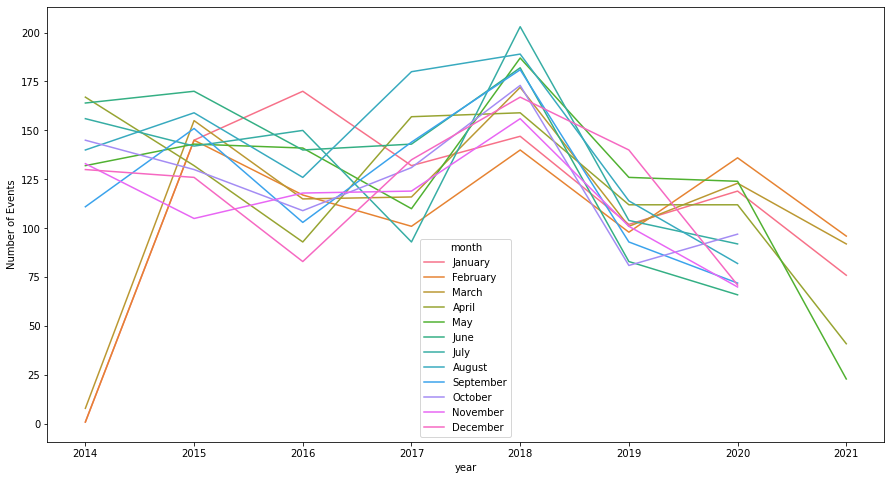

In [93]:
merged_UOF_no_outliers_1['year'] = merged_UOF_no_outliers_1['year'].astype('str')

group_1 = merged_UOF_no_outliers_1.groupby(['year','month']).size()

group_1 = pd.DataFrame(group_1).reset_index().rename(columns={0:'Number of Events'})
group_1['month'].replace({1: 'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'},inplace=True)

plt.figure(figsize=(15,8))
g = sns.lineplot(data= group_1, x='year',y='Number of Events',hue="month")

plt.show()

In [94]:
group_1.head()

,year,month,Number of Events
0,2014,January,1
1,2014,February,1
2,2014,March,8
3,2014,April,167
4,2014,May,132


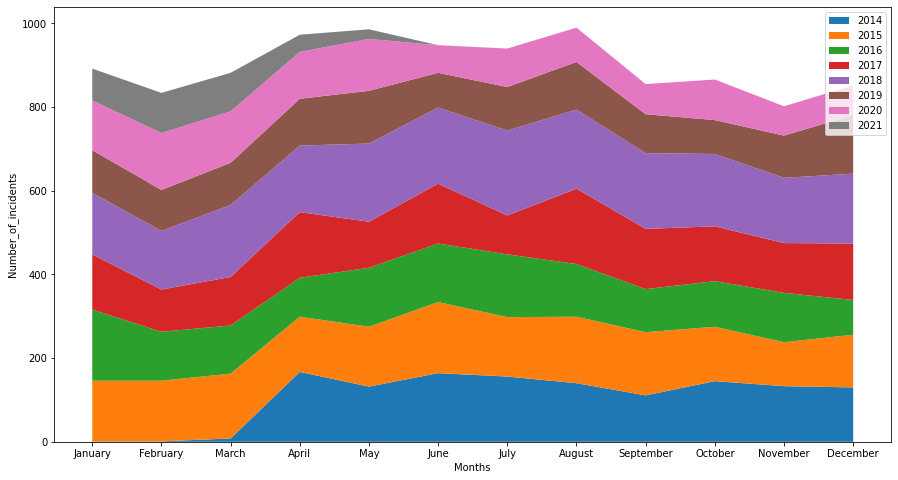

In [95]:
year_list = group_1['year'].unique().tolist()
month_list = group_1['month'].unique().tolist()
count = {}
for i in year_list:
    val = group_1[group_1['year']== i]['Number of Events'].tolist()
    if len(val) < len(month_list):
        val += ([0] * (len(month_list) - len(val)))
    count[i] = val

plt.figure(figsize=(15,8))        
plt.stackplot(month_list, count['2014'], count['2015'],count['2016'],count['2017'],count['2018'],count['2019'],count['2020'],count['2021'],labels=year_list)
plt.xlabel('Months')
plt.ylabel('Number_of_incidents')
plt.legend(loc='upper right')
plt.show()



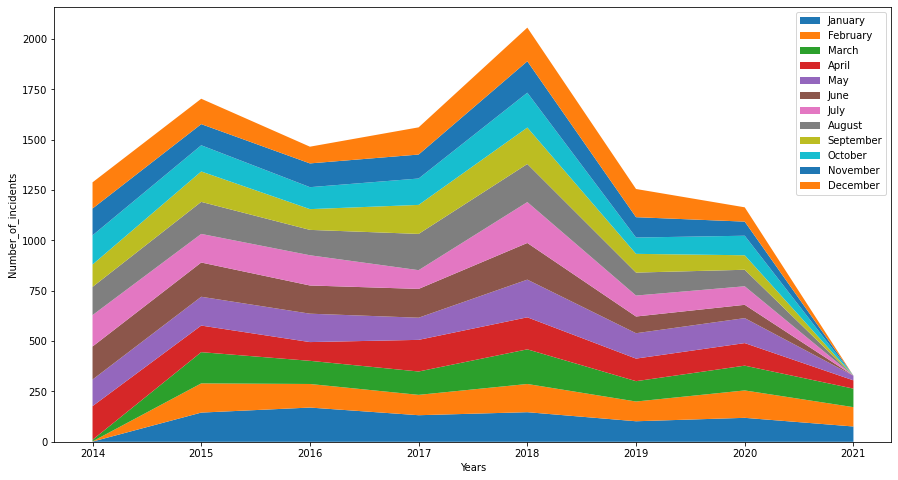

In [96]:
count_2 = {}
for i in month_list:
    val = group_1[group_1['month']== i]['Number of Events'].tolist()
    if len(val) < len(year_list):
        val += ([0] * (len(year_list) - len(val)))
    count_2[i] = val

plt.figure(figsize=(15,8))
plt.stackplot(year_list, count_2['January'], count_2['February'],count_2['March'],count_2['April'],count_2['May'],count_2['June'],count_2['July'],count_2['August'],count_2['September'],count_2['October'],count_2['November'],count_2['December'],labels=month_list)
plt.xlabel('Years')
plt.ylabel('Number_of_incidents')
plt.legend(loc='upper right')
plt.show()

In [97]:
#get the count of number of events per day of week
merged_UOF_no_outliers["Occurred_Date"] = merged_UOF_no_outliers["Occurred_Date"].astype('datetime64')
day  = merged_UOF_no_outliers["Occurred_Date"].dt.to_period("D")

daily_events = merged_UOF_no_outliers.groupby(day).size()
daily_events.sort_values(ascending=False)

Occurred_Date
2014-06-22    14
2016-08-23    14
2014-06-14    14
2020-05-03    14
2014-04-19    14
2016-08-17    14
2018-07-26    14
2017-01-20    14
2018-06-07    14
2015-01-28    14
2015-06-12    14
2016-01-23    14
2018-03-19    14
2018-08-17    14
2014-09-20    13
2018-07-21    13
2017-08-03    13
2016-10-20    13
2018-09-28    13
2016-01-01    13
2014-10-07    13
2018-12-06    13
2019-04-19    13
2015-12-30    13
2018-03-28    13
2018-06-29    13
2017-08-13    13
2018-09-01    13
2017-08-22    13
2018-07-27    13
2018-06-14    13
2014-12-31    13
2014-07-12    13
2014-04-05    13
2015-01-06    13
2016-05-13    13
2018-08-09    13
2018-01-31    13
2020-08-26    13
2015-02-08    13
2014-08-26    13
2020-02-25    12
2014-07-02    12
2018-12-23    12
2018-05-08    12
2017-04-25    12
2020-06-04    12
2017-04-26    12
2017-07-25    12
2017-02-08    12
2017-04-01    12
2014-07-23    12
2014-12-30    12
2017-03-07    12
2018-07-31    12
2014-11-13    12
2014-04-28    12
2014-11-19    12


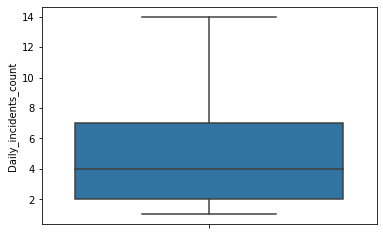

In [98]:
#boxplot of daily event counts
daily_events_df = pd.DataFrame(daily_events).reset_index().rename(columns={0:'count'})
ax_2 = sns.boxplot(y=daily_events_df['count'],showfliers=True)
ax_2.set_ylabel('Daily_incidents_count')
plt.show()

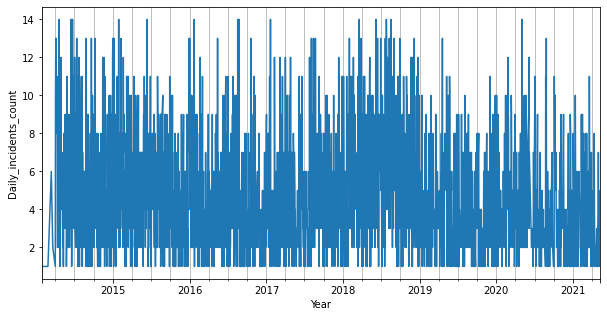

In [99]:
#plot the number of events per day over time
line = daily_events.plot(xlabel="Year",ylabel="Daily_incidents_count",figsize=(10,5))
line.grid('on', which='minor', axis='x' )
line.grid('off', which='major', axis='x' )
plt.show()

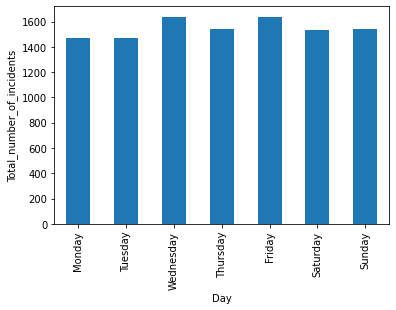

In [100]:
#group events by the day of the week
daily_events_1 = merged_UOF_no_outliers.groupby(["day"]).size()
daily_events_1 = daily_events_1.rename(index={0: 'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}) #changes name of week
daily_events_1.plot(kind = "bar", xlabel="Day",ylabel="Total_number_of_incidents")
plt.show()

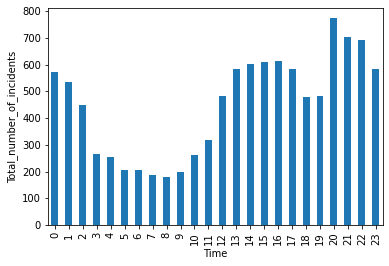

In [101]:
#group events by the time of day
#merged_UOF_no_outliers["hour"] = merged_UOF_no_outliers["Occured_date_time"].dt.hour
events_per_time = merged_UOF_no_outliers.groupby(["hour"]).size()
events_per_time.plot(kind = "bar",xlabel="Time",ylabel="Total_number_of_incidents")
plt.show()

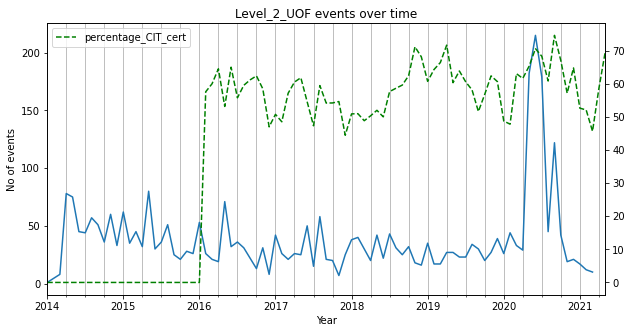

In [102]:
#Level_2_UOF_events per month over time

monthly_Level_2_UOF = Level_2_UOF.groupby(['month']).size()
ax = monthly_Level_2_UOF.plot(title="Level_2_UOF events over time",xlabel="Year",ylabel="No of events",figsize=(10,5))
ax.grid('off', which='minor', axis='x' )
ax.grid('off', which='major', axis='x' )

ax1 = ax.twinx()
ax1.spines['right'].set_position(('axes', 1.0))
ax1.grid('off', which='major', axis='y' )
CIT_Certified_monthly.plot(ax=ax1,style=['g'],linestyle='--')

# ax1 = ax.secondary_yaxis('right')
# CIT_Certified_monthly.plot(ax =ax1 ,style=['g'],linestyle='--')
plt.show()

In [103]:
merged_UOF.GO_Num.nunique()

6707

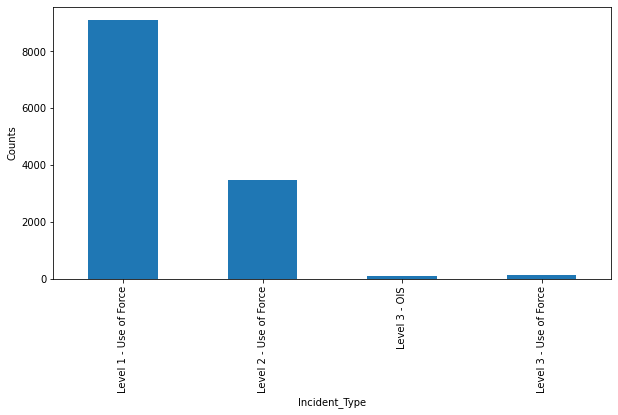

In [104]:
plt.figure(figsize=(10, 5))
bar = merged_UOF.groupby("Incident_Type").size()
ax = bar.plot(kind = 'bar')
ax.set_ylabel('Counts')
plt.show()

In [ ]:
Sectors = merged_UOF.groupby('Sector').size()
Sectors    


Text(0, 0.5, 'Use of Force Incidents')

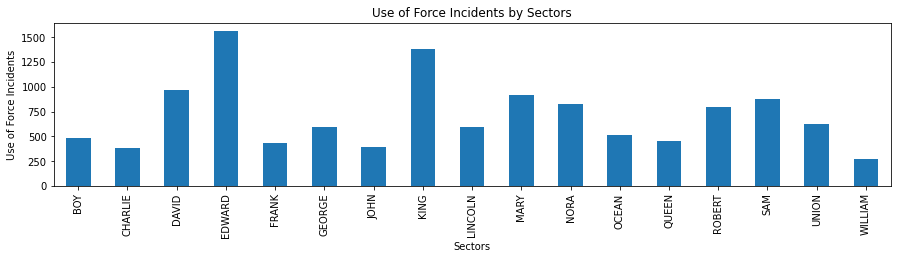

In [106]:
plt.figure(figsize=(15, 3))
Sectors.plot.bar()
plt.title('Use of Force Incidents by Sectors')
plt.xlabel('Sectors')
plt.ylabel('Use of Force Incidents')

In [107]:
Officer_Gender= merged_UOF.groupby('Officer_Gender').size()
Officer_Gender

Officer_Gender
F     1370
M    11397
N        1
dtype: int64

Text(0, 0.5, 'Use of Force Incidents')

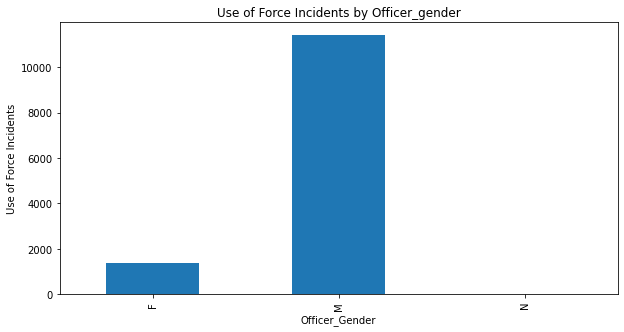

In [108]:
plt.figure(figsize=(10, 5))
Officer_Gender.plot.bar()
plt.title('Use of Force Incidents by Officer_gender')
plt.xlabel('Officer_Gender')
plt.ylabel('Use of Force Incidents')

In [132]:
Subject_Race= merged_UOF.groupby(['Subject_Race']).size()
Subject_Race

Subject_Race
American Indian/Alaska Native     123
Asian                             443
Black or African American        3793
Hispanic or Latino                451
Nat Hawaiian/Oth Pac Islander      75
White                            5198
dtype: int64

Text(0, 0.5, 'Use of Force Incidents')

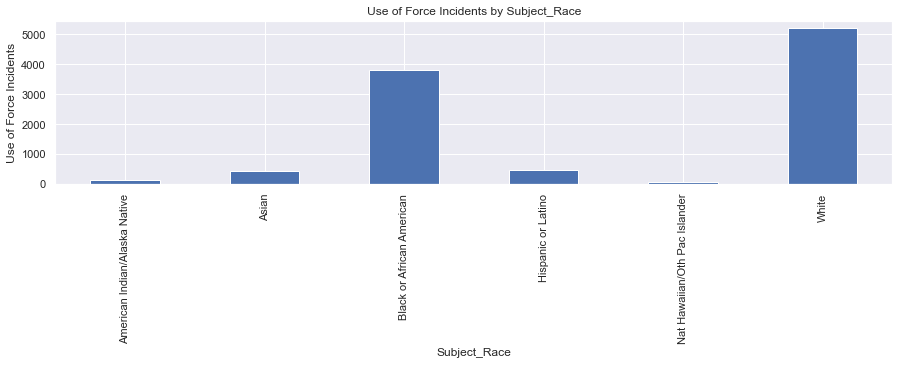

In [133]:
plt.figure(figsize=(15, 3))
Subject_Race.plot.bar()
plt.title('Use of Force Incidents by Subject_Race')
plt.xlabel('Subject_Race')
plt.ylabel('Use of Force Incidents')

Text(0, 0.5, 'Use of Force Incidents')

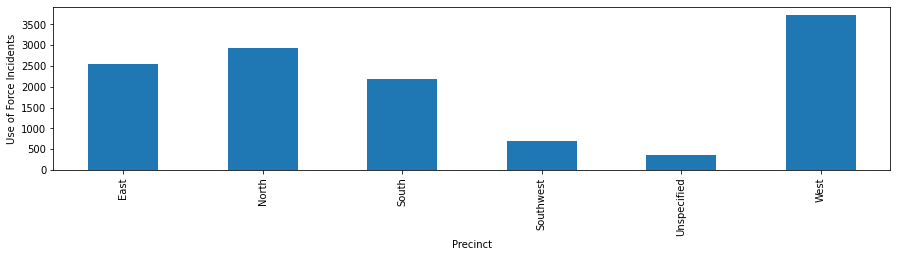

In [111]:
merged_UOF.Precinct = merged_UOF.Precinct.replace({0:'Unspecified','OOJ':'Unspecified','X':'Unspecified'})
Precinct= merged_UOF.groupby(['Precinct']).count()['Incident_Num']
plt.figure(figsize=(15, 3))
Precinct.plot.bar()
#plt.title('Use of Force Incidents by Subject_Race')
plt.xlabel('Precinct')
plt.ylabel('Use of Force Incidents')

Text(0, 0.5, 'Use of Force Incidents')

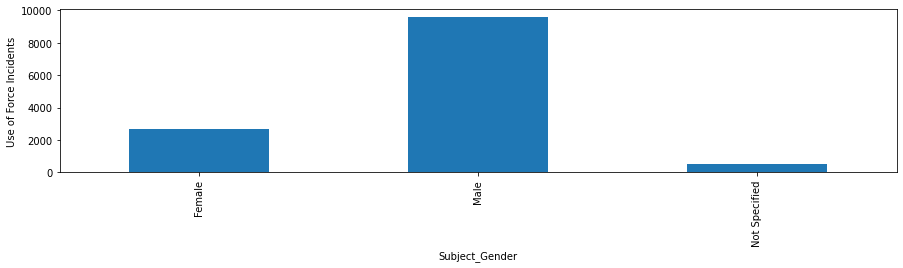

In [112]:
#merged_UOF.Subject_Gender = merged_UOF.Subject_Gender.replace({0:'Unspecified','OOJ':'Unspecified','X':'Unspecified'})
Subject_Gender= merged_UOF.groupby(['Subject_Gender']).size()
plt.figure(figsize=(15, 3))
Subject_Gender.plot.bar()
#plt.title('Use of Force Incidents by Subject_Race')
plt.xlabel('Subject_Gender')
plt.ylabel('Use of Force Incidents')

Text(0, 0.5, 'Use of Force Incidents')

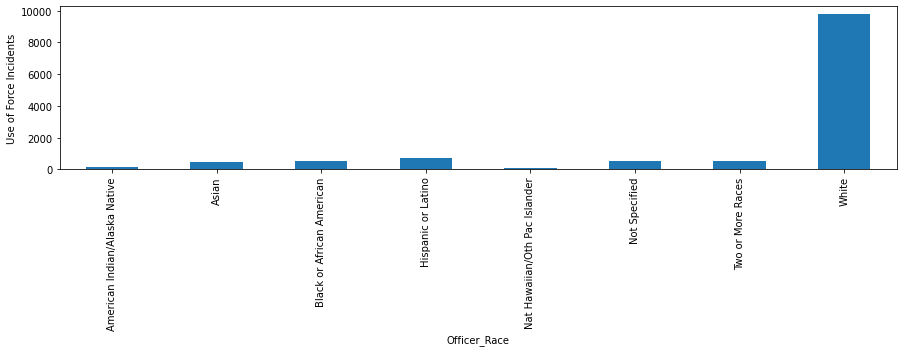

In [113]:
merged_UOF.Officer_Race = merged_UOF.Officer_Race.replace({'Unknown':'Not Specified'})
Officer_Race= merged_UOF.groupby(['Officer_Race']).count()['Incident_Num']
plt.figure(figsize=(15, 3))
Officer_Race.plot.bar()
#plt.title('Use of Force Incidents by Subject_Race')
plt.xlabel('Officer_Race')
plt.ylabel('Use of Force Incidents')

Text(0, 0.5, 'Use of Force Incidents')

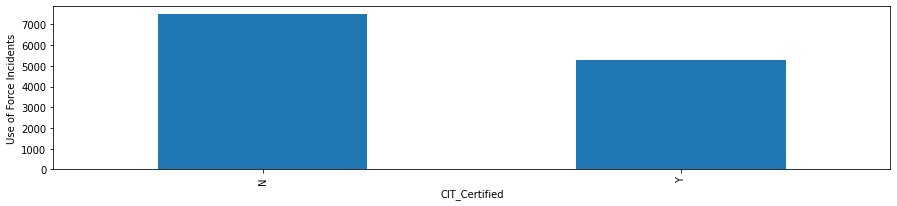

In [114]:
CIT_Cert= merged_UOF.groupby(['CIT_Certified']).count()['Incident_Num']
plt.figure(figsize=(15, 3))
CIT_Cert.plot.bar()
#plt.title('Use of Force Incidents by Subject_Race')
plt.xlabel('CIT_Certified')
plt.ylabel('Use of Force Incidents')

In [ ]:
merged_UOF.info

In [116]:
merged_UOF["Incident_Type"]


0        Level 2 - Use of Force
1        Level 1 - Use of Force
2        Level 1 - Use of Force
3        Level 2 - Use of Force
4        Level 1 - Use of Force
                  ...          
12763    Level 1 - Use of Force
12764    Level 1 - Use of Force
12765    Level 1 - Use of Force
12766    Level 1 - Use of Force
12767    Level 1 - Use of Force
Name: Incident_Type, Length: 12768, dtype: category
Categories (4, object): ['Level 1 - Use of Force', 'Level 2 - Use of Force', 'Level 3 - OIS', 'Level 3 - Use of Force']

# <font color='red'>chisq analysis for the data with outliers

In [117]:
def perform_chisq(df):
    """
    Perform a chi-square test between `IncidentType` and `CIT`
    and report the p-value and whether the difference is significant or not
    
    Null hypothesis: There are no relationships between the CIT training and Incident Type. If you know the value of one variable, it does not help you predict the value of another variable.
    Alternative hypothesis: There are relationships between the categorical variables. Knowing the value of one variable does help you predict the value of another variable.
    
    For a Chi-square test, a p-value that is less than or equal to your significance level indicates there is sufficient evidence to conclude that the observed distribution is not the same as the expected distribution.
    You can conclude that a relationship exists between the categorical variables.
    
    Arguments:
    IncidentType, CIT: Two pandas series (categorical data)
    
    Outputs:
    p: A number of type float, the p-value
    sig: A boolean; True if difference is significant, False otherwise
    """
    IncidentType = df['Incident_Type']
    CIT = df['CIT_Certified']
    contingency = pd.crosstab(CIT, IncidentType)
    c, p, dof, expected = chi2_contingency(contingency)
    
    sig = p<=0.05
        
    return ("p = " + str(p) + " significance = " + str(sig))

In [118]:
print(perform_chisq(merged_UOF))

p = 7.325678396296974e-07 significance = True


In [119]:
#The following function generates the contingency table between Incident_type and another given variable named var
def get_ct(df, var):
    ct_res = pd.crosstab(df[var], df['Incident_Type'], margins=True)
    #ct_res['Level_2_3_UOF(%)'] = round( (ct_res['Level_2_UOF']+ct_res['Level_3_UOF']+ct_res['Level_3_OIS'])/ct_res['All']*100, 2)
    return ct_res.drop(columns='All')

In [120]:
#ct for the data without duplicates
get_ct(merged_UOF_copy, 'CIT_Certified')

Incident_Type,Level_1_UOF,Level_2_UOF,Level_3_OIS,Level_3_UOF
CIT_Certified,,,,
N,5332,1849,42,68
Y,3537,1481,34,47
All,8869,3330,76,115


In [121]:
#The following function generates the contingency table between Incident_type and another given variable named var
def get_ct_norm(df, var):
    ct_res = pd.crosstab(df[var], df['Incident_Type'], margins=True, normalize = 'columns')
    #ct_res['Level_2_3_UOF(%)'] = round( (ct_res['Level_2_UOF']+ct_res['Level_3_UOF']+ct_res['Level_3_OIS'])/ct_res['All']*100, 2)
    return ct_res.drop(columns='All')

In [122]:
#normalized ct for the data without duplicates
get_ct_norm(merged_UOF_copy, 'CIT_Certified')

Incident_Type,Level_1_UOF,Level_2_UOF,Level_3_OIS,Level_3_UOF
CIT_Certified,,,,
N,0.601195,0.555255,0.552632,0.591304
Y,0.398805,0.444745,0.447368,0.408696


In [123]:
#Chi-square test for the data without duplicates
perform_chisq(merged_UOF_copy)

'p = 8.260884654428196e-05 significance = True'

In [124]:
#df with the level_2 and 3 UOF combined
Level_1_23_UOF = merged_UOF_copy.replace({'Level_2_UOF':'Level_2_above_UOF','Level_3_UOF':'Level_2_above_UOF','Level_3_OIS':'Level_2_above_UOF'})
get_ct_norm(Level_1_23_UOF, 'CIT_Certified')

Incident_Type,Level_1_UOF,Level_2_above_UOF
CIT_Certified,,
N,0.601195,0.556376
Y,0.398805,0.443624


In [125]:
#Chi-square test for the data with the level_2 and 3 UOF combined
perform_chisq(Level_1_23_UOF)

'p = 5.312594179342305e-06 significance = True'

In [126]:
#df with the level_2 and 3 UOF combined
Level_1_23_UOF_Female = merged_UOF_copy.replace({'Level_2_UOF':'Level_2_above_UOF','Level_3_UOF':'Level_2_above_UOF','Level_3_OIS':'Level_2_above_UOF'})
get_ct_norm(Level_1_23_UOF, 'CIT_Certified')

Incident_Type,Level_1_UOF,Level_2_above_UOF
CIT_Certified,,
N,0.601195,0.556376
Y,0.398805,0.443624


# <font color='red'>chisq analysis for the data without outliers

In [127]:
#ct for the data without outliers
get_ct(merged_UOF_no_outliers, 'CIT_Certified')

Incident_Type,Level_1_UOF,Level_2_UOF,Level_3_OIS,Level_3_UOF
CIT_Certified,,,,
N,4926,1427,26,64
Y,3345,957,34,41
All,8271,2384,60,105


In [128]:
#Chi-square test for the data without outliers
perform_chisq(merged_UOF_no_outliers)

'p = 0.08102948585352572 significance = False'

In [129]:
#df with the level_2 and 3 UOF combined
Level_1_23_no_outliers = merged_UOF_no_outliers.replace({'Level_2_UOF':'Level_2_above_UOF','Level_3_UOF':'Level_2_above_UOF','Level_3_OIS':'Level_2_above_UOF'})
perform_chisq(Level_1_23_no_outliers)

'p = 0.9868723355322381 significance = False'

In [130]:
import folium  #needed for interactive map
from folium.plugins import HeatMap
%matplotlib inline
sns.set()
 
locs = list(zip(merged_UOF.Latitude.dropna(), merged_UOF.Longitude.dropna()))
folium_map = folium.Map(location=[47.60, -122.3],zoom_start=12, tiles="OpenStreetMap")
myheat = HeatMap(locs, min_opacity =0.1, radius=5, blur=5)
folium_map.add_child(myheat)

In [131]:
def perform_chisq(IncidentType, CIT):
    """
    Perform a chi-square test between `IncidentType` and `CIT`
    and report the p-value and whether the difference is significant or not
    
    Null hypothesis: There are no relationships between the CIT training and Incident Type. If you know the value of one variable, it does not help you predict the value of another variable.
    Alternative hypothesis: There are relationships between the categorical variables. Knowing the value of one variable does help you predict the value of another variable.
    
    For a Chi-square test, a p-value that is less than or equal to your significance level indicates there is sufficient evidence to conclude that the observed distribution is not the same as the expected distribution.
    You can conclude that a relationship exists between the categorical variables.
    
    Arguments:
    IncidentType, CIT: Two pandas series (categorical data)
    
    Outputs:
    p: A number of type float, the p-value
    sig: A boolean; True if difference is significant, False otherwise
    """
    IncidentType = merged_UOF['Incident_Type']
    CIT = merged_UOF['CIT_Certified']
    contingency = pd.crosstab(IncidentType,CIT)
    p = c, p, dof, expected = chi2_contingency(contingency)
    
    sig = p<=0.05
        
    return p, sig